In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0: setosa, 1: versicolor, 2: virginica)

# Display feature names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized (first 5 samples):")
print(X_scaled[:5])

Data standardized (first 5 samples):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca,
                      columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

print("\nPCA transformed data (first 5 samples):")
print(pca_df.head())


PCA transformed data (first 5 samples):
   Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


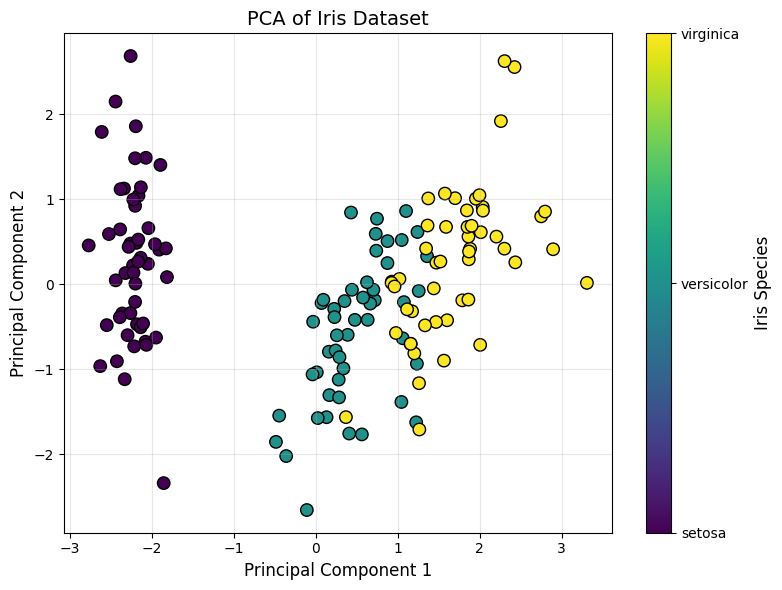

In [5]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'],
                     pca_df['Principal Component 2'],
                     c=pca_df['Target'],
                     cmap='viridis',
                     edgecolor='k',
                     s=80)

plt.title('PCA of Iris Dataset', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Add colorbar with class labels
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(iris.target_names)
cbar.set_label('Iris Species', fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Cumulative explained variance
print(f'Total explained variance: {sum(explained_variance):.2%}')

Explained variance by each component: [0.72962445 0.22850762]
Total explained variance: 95.81%
